In [32]:
import numpy as np
from pyDOE import *
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import minimize
import matplotlib.pyplot as plt


def calculate_average_distance(ensemble_data):
    """
    Calculate the average Euclidean distance of each ensemble's parameters to those of other ensembles.
    
    Parameters:
    ensemble_data (numpy.ndarray): A 2D array where each row represents an ensemble and each column represents a parameter.
    
    Returns:
    numpy.ndarray: A 1D array containing the average distance for each ensemble.
    """
    num_ensembles, num_parameters = ensemble_data.shape
    average_distances = np.zeros(num_ensembles)
    
    # Compute pairwise Euclidean distances
    for j in range(num_ensembles):
        distances = []
        for m in range(num_ensembles):
            if j != m:
                # Calculate the Euclidean distance between ensemble j and ensemble m
                dist = np.sqrt(np.sum((ensemble_data[j] - ensemble_data[m]) ** 2))
                distances.append(dist)
        
        # Average distance for ensemble j
        average_distances[j] = np.mean(distances)
    
    # Normalize by the number of parameters and ensembles
    normalized_distances = average_distances / (num_parameters * (num_ensembles - 1))
    
    return normalized_distances

def create_param_ranges(file_path):
    param_ranges = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            if len(parts) == 3:
                param_name = "TEST_" + parts[0]
                param_range = (float(parts[1]), float(parts[2]))
                param_ranges[param_name] = param_range
    return param_ranges


input_file = "PPE_values.txt"
parameters_file = "parameters_for_script.txt"

# Read the parameter names from the parameters_file
with open(parameters_file, 'r') as param_file:
    # Extract the parameter names from the file
    parameter_names = [line.split()[0] for line in param_file.read().strip().split('\n')]
# Read the first line of the PPE_values.txt file
with open(input_file, 'r') as file:
    lines = file.readlines()
# Split the first line into a list of strings
header = lines[0].strip().split()
header = parameter_names
# Set last 3 values to 1 
header.extend(['INSTALL', 'START', 'END'])
# Include the name of the simulation here
header.insert(0, '0')
# Join the modified header back into a single string
new_header = ' '.join(header)

# Replace the first line with the new header
lines[0] = new_header + '\n'

# Write the modified lines back to the file
with open(input_file, 'w') as file:
    file.writelines(lines)

print("Header updated successfully.")


Header updated successfully.


Maximin Latin Hypercube Sampling completed successfully!
0.011814405124879579


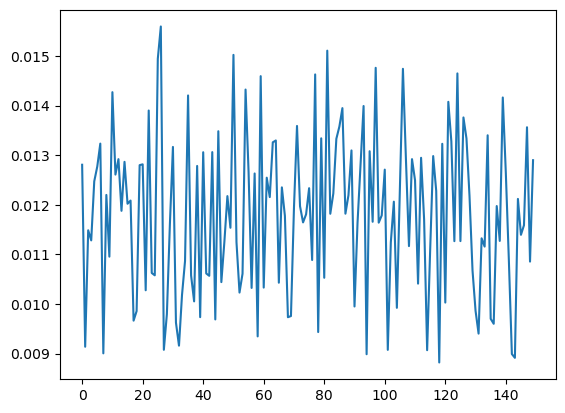

In [33]:
parameters_file = "/home/ybhatti/yusufb/Branches/PPE_Scripts/parameters_for_script.txt"
Parameters_and_ranges = create_param_ranges(parameters_file)
param_ranges = Parameters_and_ranges.values()

# Number of samples
n_samples = 150

# Generate initial LHS sample
lhs_sample = lhs(len(param_ranges), samples=n_samples, criterion='maximin')

# Scale LHS sample to parameter ranges
scaled_samples = np.zeros_like(lhs_sample)
for i, (low, high) in enumerate(param_ranges):
    scaled_samples[:, i] = low + (high - low) * lhs_sample[:, i]

# # Maximin criterion
# def min_dist(x):
#     """ Objective function to maximize the minimum pairwise distance """
#     x = x.reshape(n_samples, len(param_ranges))
#     dists = pdist(x)
#     return -np.min(dists)

# # Flatten the scaled samples for optimization
# x0 = scaled_samples.flatten()

# # Bounds for each parameter in the sample
# bounds = [(low, high) for (low, high) in param_ranges] * n_samples

# # Optimize to apply the maximin criterion
# result = minimize(min_dist, x0, bounds=bounds, method='L-BFGS-B')

# # Reshape the optimized result back to the original sample shape
# optimized_samples = result.x.reshape(n_samples, len(param_ranges))

# Save the optimized samples to a file
np.savetxt("LHC_Parameters.txt", scaled_samples, delimiter=" ")

print("Maximin Latin Hypercube Sampling completed successfully!")
# Calculate average distances
avg_distances = calculate_average_distance(scaled_samples)
print(np.nanmean(avg_distances))
plt.plot(avg_distances)
# Print the results
#print("Average distances for each ensemble:", avg_distances)

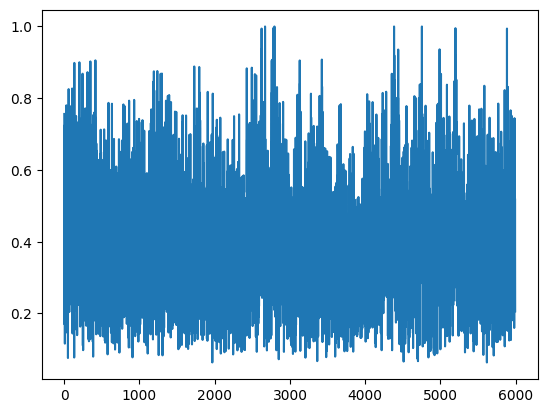

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# Load the optimized samples
#optimized_samples = np.loadtxt("optimized_samples.txt")
#optimized_samples=optimized_samples.reshape(22,5)
# Calculate pairwise Euclidean distances
dists = pdist(optimized_samples, metric='euclidean')

# Normalize distances relative to the maximum distance
max_dist = np.max(dists)
relative_dists = dists / max_dist
plt.plot(relative_dists)
# # Visualize the distribution of relative distances using a histogram
# plt.figure(figsize=(10, 6))
# plt.hist(relative_dists, bins=30, edgecolor='k', alpha=0.7)
# plt.title("Histogram of Relative Euclidean Distances")
# plt.xlabel("Relative Euclidean Distance")
# plt.ylabel("Frequency")
# plt.show()

# # Visualize the distribution of relative distances using a box plot
# plt.figure(figsize=(10, 6))
# plt.boxplot(relative_dists, vert=False)
# plt.title("Box Plot of Relative Euclidean Distances")
# plt.xlabel("Relative Euclidean Distance")
# plt.show()


In [2]:
import numpy as np
from skopt.sampler import Lhs
from skopt.space import Real
import pandas as pd

param_ranges = {
    "TEST_V__EMI_DMS": (0.5, 2.0),
    "TEST_V_SCALE_EMI_FF": (0.5, 2.0),
    "TEST_V_SCALE_EMI_ANTH_SO2": (0.6, 1.5),
    "TEST_V_SCALE_EMI_DUST": (0.5, 2.0),
    "TEST_V_SCALE_EMI_SSA": (0.125, 8.0),
    "TEST_V_SCALE_EMI_BB": (0.25, 4.0),
    "TEST_V_SCALE_EMI_BF": (0.25, 4.0),
    "TEST_V_SCALE_EMI_CMR_BF(30)": (50, 200),
    "TEST_V_SCALE_EMI_CMR_FF(30)": (30, 80),
    "Y(30 -> 90)": (30, 90),
    "TEST_V_SCALE_EMI_CMR_BB(75)": (50, 200),
    "TEST_V_SCALE_BC_RAD_NI(0.71)": (0.45, 0.9),
    "TEST_V_SCALE_DU_RAD_NI(0.001)": (0, 0.01),
    "TEST_V_SCALE_NUC_FT": (0.01, 10.0),
    "TEST_V_SCALE_DRYDEP_ACC": (0.1, 10.0),
    "TEST_V_SCALE_DRYDEP_COA": (0.15, 5.0),
    "TEST_V_SCALE_DRYDEP_AIT": (0.2, 2.0),
    "TEST_V_SCALE_SO4_COATING": (0.3, 5.0),
    "TEST_V_SCALE_CLOUD_PH": (4.5, 7.0),
    "TEST_V_SCALE_VERTICAL_VELOCITY": (0.5, 2.0)
}
